#Aluno: Roberto Batista de Araujo Filho
#Desafio: implementar o algoritmo de classificação kNN

## Funcionamento do kNN

O algoritmo kNN está entre os mais simples algoritmos de aprendizado de máquina. Em sua versão original, seu uso é destinado à tarefas de classificação de dados numéricos.

A figura abaixo ilustra o processo realizado pelo kNN para predizer o rótulo (ou classe) de uma instância a partir de um conjunto de treinamento:

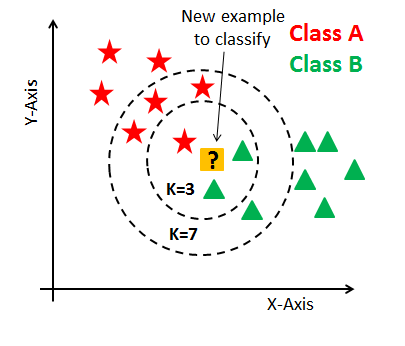


Em síntese, o processo de predição é composto por 3 etapas, conforme segue:

1. Calcular a distância entre a instância x que se deseja rotular e todos os pontos de um conjunto de treinamento dado. Conjuntos de treinamento são conjuntos de instâncias que possuem algum rótulo previamente especificado e são utilizados como exemplos do domínio que se deseja que o modelo aprenda.

2. Idenficar quais são os k vizinhos mais próximos. O valor de K é especificado pelo usuário da função. É importante que o valor escolhido não favoreça possíveis empates. Por esse motivo, o valor de k geralmente é um número ímpar diferente do número de classes do domínio (ex: se existem 3 classes possíveis, k deve ser um valor >= 5).

3. Contar os votos. O rótulo de x será o rótulo mais comum entre os seus k vizinhos mais próximos

## Testando um algoritmo de classificação

O processo de testar um algoritmo de classificação pode ser muito simples. Basta selecionar um dataset previamente rotulado e dividí-lo em conjuntos de treinamento e teste.

O conjunto de treinamento, como dito antes, serve como base do aprendizado. É dele que o algoritmo tira informações para "entender" os padrões de comportamento entre instâncias de uma mesma classe que as diferencia das instâncias de outras classes.

O conjunto de testes é utilizado para verficar a capacidade do algoritmo em predizer corretamente um rótulo para uma instância. Para tanto, as instâncias do conjunto de testes são submetidas ao modelo preditivo para que ele as rotule e, em seguida, faz-se a medição da taxa de acerto obtida, também conhecida como acurácia. O cálculo da acurácia a razão entre o número de instâncias preditas corretamente e o tamanho do conjunto e treinamento.

## Desafio

Isto posto, vamos ao desafio. Sua tarefa será desenvolver o algoritmo kNN, aplicá-lo no dataset [Iris](https://pt.wikipedia.org/wiki/Conjunto_de_dados_flor_Iris) e verificar a sua acurácia. O teste de acurácia deve ser realizado com um conjunto de testes composto por 20% do dataset. Lembre-se que essas instâncias não podem compor o conjunto de treinamento.

Para tanto, você precisa desenvolver a função que dividirá a base entre conjunto de treinamento e teste, a classe kNN e a função de cálculo de acurácia.



In [1]:
# Obtendo o dataset iris

from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = np.array(iris.data) # matriz de instâncias
y = np.array(iris.target) # vetor de rótulos


### A função dividir_treino_teste

  A função dividir_treino_teste deve receber como parâmetros a matriz de instâncias e o vetor de rótulos de um dataset qualquer e um valor decimal equivalente ao percentual da base que se deseja separar para compor o conjunto de treinamento.

  É importante lembrar que normalmente os datasets vêm ordenados pelos rótulos. Com o dataset iris não é diferente, assim sendo, é necessário desordenar a base antes de realizar a divisão. Se isso não for feito, o conjunto de testes será composto exclusivamente por instâncias da classe 'virginica' (as classes são 0, 1 e 2 que represententam as classes de flores 'setosa', 'versicolor' e 'virginica' respectivamente).

  Após reordenar a base (utilize o seed zero), vocês devem calcular o número de instâncias que serão utilizadas para compor o conjunto de treinamento. Em seguida, devem ser criados os seguintes arrays:

    1. x_treino: matriz de instâncias do conjunto de treinamento;

    2. y_treino: vetor de rótulos das instâncias do conjunto de treinamento;

    3. x_teste: matriz de instâncias do conjunto de testes;

    4. y_teste: vetor de rótulos das instâncias do conjunto de testes.

  Ao final da função os arrays criados devem ser retornados.




In [2]:
# Insira aqui o código da função 'dividir_treino_teste'

def dividir_treino_teste(X,y,perc_treino):

  # Verifica valores passados na função
  if not (isinstance(X, np.ndarray) and X.ndim > 1):
    print("X precisa ser uma matriz com, pelo menos, 2 instancias")
    return
  if not (isinstance(y, np.ndarray) and y.ndim == 1):
    print("y precisa ser um vetor")
    return
  if len(X) != len(y):
    print("A matriz de instâncias NÃO possui mesmo número de linhas que o vetor de rótulos")
    return
  if (not isinstance(perc_treino, float)) or perc_treino < 0 or perc_treino > 1 :
    print("O valor do percentual dever ser um decimal entre 0 e 1")
    return

  # Embaralha os indices e aplica em X e y
  np.random.seed(0)
  indices_embaralhados = np.random.permutation(X.shape[0])
  X_embaralhado = X[indices_embaralhados]
  y_embaralhado = y[indices_embaralhados]

  # Divide entre treino e testes
  limite = int(len(X)*perc_treino)
  X_treino = X_embaralhado[:limite]
  X_teste = X_embaralhado[limite:]
  y_treino = y_embaralhado[:limite]
  y_teste = y_embaralhado[limite:]

  return X_treino, y_treino, X_teste, y_teste


### A classe kNN
  **Inicialização:** número de vizinhos mais próximos desejado.

  **Função fit:** função responsável por armazenar em variáveis globais a matriz de instâncias (x_treino) e o vetor de rótulos (y_treino) do conjunto de treinamento. Lembre-se que a matriz de instâncias deve possuir o mesmo número de linhas que o vetor de rótulos.

  **Função predict:**  função responsável por receber uma matriz de instâncias não classificadas (x_teste) e classificá-las, retornando um vetor de rótulos. Lembre-se que x_teste deve possuir o mesmo número de colunas que x_treino. Lembre-se também que a função predict só pode ser chamada após a função fit ser executada.

  Etapas:

    1. Iterar sobre x_teste e, em cada iteração, adicionar num vetor 'classes' o rótulo da instância analisada.
    O vetor final deve ser um vetor de tamanho equivalente ao número de linhas de x_teste, onde classes[i]
    é o rótulo predito da instância x_teste[i];

    2. Para cada iteração, deve-se calcular o vetor de distâncias entre a instância de teste (x_teste[i])
    e todas as instâncias do conjunto de treinamento. Utilizem a distância euclidiana;

    3. Crie um vetor com os índices de x_teste ordenados da instância mais próxima de i até a mais distânte.

    4. Crie um vetor com as classes das k instâncias mais próximas de i em y_treino;

    5. Identifique neste vetor qual a classe mais frequente. Essa será a classe de i;

    6. Adicione a classe de i no vetor classes e passe para a próxima iteração.



In [3]:
# Insira aqui o código da classe kNN
class kNN:
  def __init__(self,k):
    self.k = k
    self.X_treino, self.y_treino = [], []
    self.fit_flag = 0

  def fit(self, X_treino, y_treino):
    if len(X_treino) != len(y_treino):
      print("ATENÇÃO: A matriz de instâncias NÃO possui mesmo número de linhas que o vetor de rótulos")
      self.fit_flag = 0
    else:
      self.X_treino = X_treino
      self.y_treino = y_treino
      self.fit_flag = 1


  def predict(self, X_teste):
    if self.fit_flag == 0:
      print("Necessário rodar primeiro o método 'fit'")
    else:
      self.X_teste = X_teste
      y_predict_list=[]
      for inst_X_teste in self.X_teste:
        distancias = np.sqrt(np.sum((self.X_treino - inst_X_teste)**2, axis=1))
        indices_distancias_ordenadas = np.argsort(distancias)
        rotulos_distancias_ordenadas = self.y_treino[indices_distancias_ordenadas]
        rotulos_k_mais_proximos = rotulos_distancias_ordenadas[:self.k]
        rotulo_maior_recorrencia = np.bincount(rotulos_k_mais_proximos).argmax()
        y_predict_list.append(rotulo_maior_recorrencia)
      y_predict = np.array(y_predict_list)
      return y_predict

### Função "acurácia":
  Essa função deve receber como parâmetro um vetor de classes preditas e outro vetor de classes preditas (y_teste) e retornar a taxa de acertos. Lembre-se que os dois vetores devem ser unidimensionais e de mesmo tamanho.

In [4]:
# Insira aqui o código da função acurácia

def acuracia(y_predito,y_teste):

  # Verifica valores passados na função
  if (not (isinstance(y_predito, np.ndarray) and y_predito.ndim == 1)) or (not (isinstance(y_teste, np.ndarray) and y_teste.ndim == 1)) or len(y_predito) != len(y_teste):
    print("Os vetores 'y_predito' e 'y_teste' devem ser unidimensionais e terem a mesma quantidade de elementos")
    return
  else:
    return (y_predito == y_teste).sum()/len(y_teste)


## Agora teste seu algoritmo

Utilize as funções e a classe criada para dividir o dataset iris em conjuntos de treino e teste com a proporção 80/20, classifique o conjunto de testes e verifique a acurácia obtida. Considere k = 5.

In [5]:
X_treino, y_treino, X_teste, y_teste = dividir_treino_teste (X,y,0.8)

predicao = kNN(5)
predicao.fit(X_treino, y_treino)
predicoes = predicao.predict(X_teste)

acuracia(predicoes, y_teste)

0.9333333333333333

### Modelo de comparação

Segue abaixo o código para utilizar a classe kNN do pacote sklearn. Após finalizar o desafio, você pode executar o código abaixo e verificar se o resultado que você obteve de acurácia bate com o que era esperado. Lembre-se que o kNN não utiliza aleatoriedade em seu processo de classificação, assim sendo, para uma mesma medida de distância, mesmo número de vizinhos e mesmos conjuntos de treinamento e teste, o resultado sempre será o mesmo.

In [6]:
# Este código só vai funcionar se o seu método de acuracia e os arrays x_treino,
# x_teste, y_treino, y_teste e a sua funcao acuracia estiverem carregados em memoria.

from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_treino, y_treino)
predicoes = neigh.predict(X_teste)

acuracia(predicoes, y_teste)

0.9333333333333333